In [54]:
import deepNN as dnn
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:


a, b = 0, 1
N = 1000

x = (b - a) * torch.rand(N, 1) + a
def func(x): return torch.sin(np.pi*x) 
def dfunc(x): return np.pi*torch.cos(np.pi*x) 
def deltafunc(x): return np.pi**2*torch.sin(np.pi*x) 


y = func(x) 

nn = dnn.DeepNet(torch.tanh, 1, [20]*3, 1) 

optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)
n_epochs = 500

pbar = trange(n_epochs)
for epoch in pbar:
    y_pred = nn(x) 
    loss = 1.0/N * torch.sum((y_pred - y)**2)
    
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 1.8e-05: 100%|██████████| 500/500 [00:02<00:00, 193.45it/s]


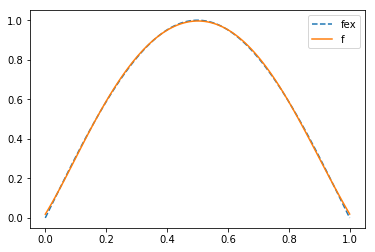

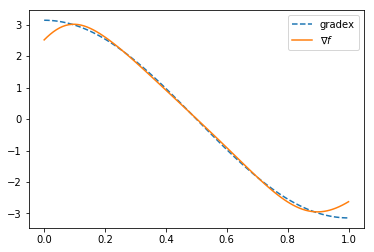

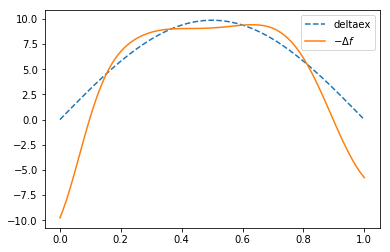

Report:
L2 error:0.004887141715854338
H1 semi-norm error:0.15262280595762007


In [56]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()


plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().numpy(), label='f')
plt.legend()
plt.show()

plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.legend()
plt.show()

plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.legend()
plt.show()

print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))


In [57]:

a, b = 0., 1.
N = 1000

x = (b - a) * torch.rand(N, 1) + a

bound = torch.tensor([a, b])
n_epochs = 500


deltaex = deltafunc(x)

pbar = trange(n_epochs)
for epoch in pbar:
    delta_pred = nn.laplacian(x) 
    loss = 1.0/N * torch.sum((delta_pred - deltaex)**2) \
            + torch.sum(nn(bound)**2)
        
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 4.9e-05: 100%|██████████| 500/500 [00:05<00:00, 87.21it/s]


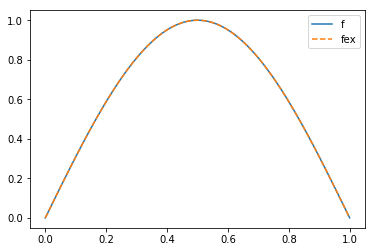

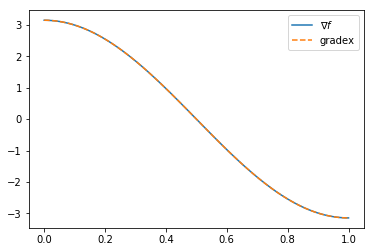

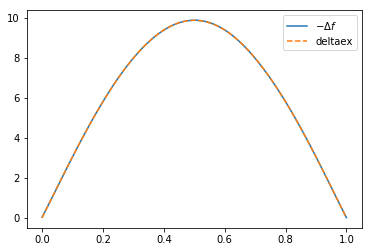

Report:
L2 error:0.00011252397998713272
H1 semi-norm error:0.00046105527558048653


In [58]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()



plt.plot(x_np, y.detach().numpy(), label='f')
plt.plot(x_np, yex, '--', label='fex')
plt.legend()
plt.show()

plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.plot(x_np, dyex, '--', label='gradex')

plt.legend()
plt.show()


plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.plot(x_np, deltaex, '--', label='deltaex')
plt.legend()
plt.show()


print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))

# ResNet

In [68]:
a, b = 0, 1
N = 1000

x = (b - a) * torch.rand(N, 1) + a
def func(x): return torch.sin(np.pi*x) 
def dfunc(x): return np.pi*torch.cos(np.pi*x) 
def deltafunc(x): return np.pi**2*torch.sin(np.pi*x) 


y = func(x) 

nn = dnn.ResNet(torch.tanh, 1, [20]*3, 1) 

optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)
n_epochs = 500

pbar = trange(n_epochs)
for epoch in pbar:
    y_pred = nn(x) 
    loss = 1.0/N * torch.sum((y_pred - y)**2)
    
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 3.2e-06: 100%|██████████| 500/500 [00:02<00:00, 178.52it/s]


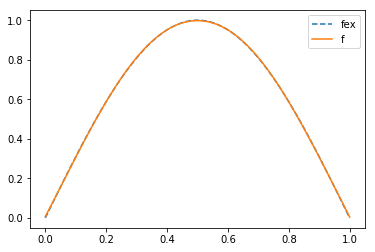

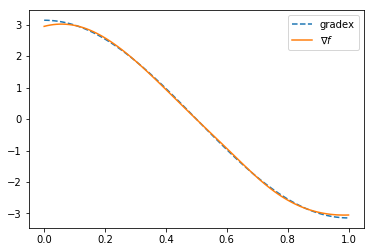

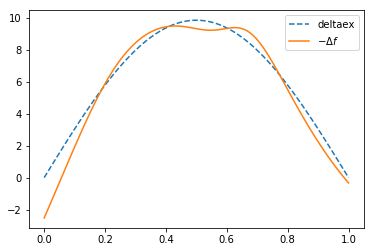

Report:
L2 error:0.0018600169658187786
H1 semi-norm error:0.04769699550164929


In [69]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()


plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().numpy(), label='f')
plt.legend()
plt.show()

plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.legend()
plt.show()

plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.legend()
plt.show()

print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))

In [70]:

a, b = 0., 1.
N = 1000

x = (b - a) * torch.rand(N, 1) + a

bound = torch.tensor([a, b])
n_epochs = 500


deltaex = deltafunc(x)

pbar = trange(n_epochs)
for epoch in pbar:
    delta_pred = nn.laplacian(x) 
    loss = 1.0/N * torch.sum((delta_pred - deltaex)**2) \
            + torch.sum(nn(bound)**2)
        
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 0.00017: 100%|██████████| 500/500 [00:06<00:00, 82.65it/s]


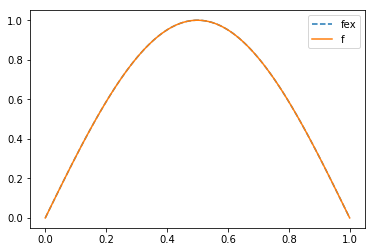

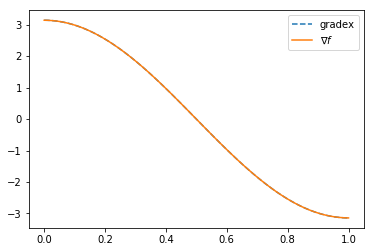

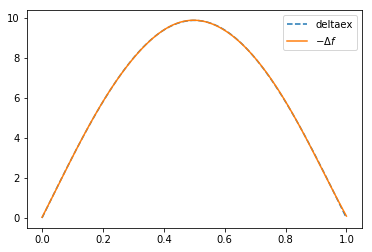

Report:
L2 error:4.4095254035635224e-05
H1 semi-norm error:0.0004730456303924268


In [71]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()


plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().numpy(), label='f')
plt.legend()
plt.show()

plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.legend()
plt.show()

plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.legend()
plt.show()

print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))